In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("E:/Downloads/allphone.csv")

# Display the DataFrame
print(df)

                                          product_name  \
0    OPPO K12x 5G with 45W SUPERVOOC Charger In-The...   
1    OPPO K12x 5G with 45W SUPERVOOC Charger In-The...   
2    OPPO K12x 5G with 45W SUPERVOOC Charger In-The...   
3    OPPO K12x 5G with 45W SUPERVOOC Charger In-The...   
4    OPPO K12x 5G with 45W SUPERVOOC Charger In-The...   
..                                                 ...   
457     CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
458     CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
459     CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
460     CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
461     CMF by Nothing Phone 1 (Black, 128 GB) Reviews   

                                                review  rating  
0                 Awesome product in this price range.       4  
1    Nice Phone Under This Range Fully Satisfy 😃😃😃😃...       5  
2                     Camera Iss Good 👍\nBattery 🔋 wow       5  
3                                 Nice came

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  462 non-null    object
 1   review        462 non-null    object
 2   rating        462 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.0+ KB


In [3]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Set the NLTK data path to the base directory
nltk.data.path.append('C:\\vscode\\nltk_data')

# Ensure you have the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def clean_nic_name(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the cleaning function to the NIC Name column
df['cleaned_review'] = df['review'].apply(clean_nic_name)

# Display the original and cleaned columns
print(df[['review', 'cleaned_review']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                review  \
0                 Awesome product in this price range.   
1    Nice Phone Under This Range Fully Satisfy 😃😃😃😃...   
2                     Camera Iss Good 👍\nBattery 🔋 wow   
3                                 Nice camera, superb.   
4    Wonderful phone. I m getting strain on my eyes...   
..                                                 ...   
457  CMF by Nothing Phone 1 is an excellent Smartph...   
458  Great product for the audience for basic regul...   
459  first impression looks good, phone is clean, n...   
460                                 Everything is good   
461  This phone is best compared to similar. It's j...   

                                        cleaned_review  
0                            awesom product price rang  
1    nice phone rang fulli satisfi 😃😃😃😃😃 battri bac...  
2                      camera iss good 👍 batteri 🔋 wow  
3                                   nice camera superb  
4    wonder phone 

In [4]:
import pandas as pd
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set the NLTK data path to the base directory
nltk.data.path.append('C:\\vscode\\nltk_data')

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('E:/Downloads/allphone.csv')

# Ensure the 'review' column exists
if 'review' not in df.columns:
    print("Error: 'review' column not found in the dataset!")
else:
    # Get the set of English stopwords
    stop_words = set(stopwords.words('english'))

    # Function to clean the review text
    def clean_text(review):
        # Remove emojis using regex
        review = re.sub(r'[^\w\s,]', '', review)  # Remove punctuation
        review = re.sub(r'http\S+', '', review)  # Remove URLs if any
        review = re.sub(r'[\U00010000-\U0010ffff]', '', review)  # Remove emojis (Unicode range)
        
        # Tokenize the review into words
        words = word_tokenize(review.lower())  # Lowercasing the text to standardize it
        # Remove stopwords and punctuation
        cleaned_words = [word for word in words if word not in stop_words and word not in string.punctuation]
        # Rejoin words back into a single string
        return ' '.join(cleaned_words)

    # Apply the cleaning function to the 'review' column
    df['cleaned_review'] = df['review'].apply(clean_text)

    # Save the cleaned DataFrame to a new CSV file
    df.to_csv('E:/Downloads/cleaned_mobilereviews_no_emojis.csv', index=False)

    # Display the first few rows to verify
    print(df[['review', 'cleaned_review']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review  \
0               Awesome product in this price range.   
1  Nice Phone Under This Range Fully Satisfy 😃😃😃😃...   
2                   Camera Iss Good 👍\nBattery 🔋 wow   
3                               Nice camera, superb.   
4  Wonderful phone. I m getting strain on my eyes...   

                                      cleaned_review  
0                        awesome product price range  
1  nice phone range fully satisfy battry backup a...  
2                        camera iss good battery wow  
3                                 nice camera superb  
4  wonderful phone getting strain eyes display 72...  


In [5]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [6]:
df

,product_name,review,rating,cleaned_review
0,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,Awesome product in this price range.,4,awesome product price range
1,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,Nice Phone Under This Range Fully Satisfy 😃😃😃😃...,5,nice phone range fully satisfy battry backup a...
2,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,Camera Iss Good 👍\nBattery 🔋 wow,5,camera iss good battery wow
3,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,"Nice camera, superb.",5,nice camera superb
4,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,Wonderful phone. I m getting strain on my eyes...,4,wonderful phone getting strain eyes display 72...
5,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,Excellent product for office use\nNice design\...,5,excellent product office use nice design good ...
6,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,Absolutely superb phone in this range\nOverall...,5,absolutely superb phone range overall performa...
7,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,Overall good,4,overall good
8,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,Amazing View Camera Quality Best..\nBattery Ba...,4,amazing view camera quality best battery backu...
9,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,Mobile performance is good.\nBattery drain fas...,4,mobile performance good battery drain fast dis...


In [8]:
import pandas as pd

if 'review' in df.columns:
    # Drop the 'review' column
    df = df.drop(columns=['review'])
    
    # Save the modified DataFrame to a new CSV file
    df.to_csv('E:/Downloads/cleaned_mobilereviews_no_review.csv', index=False)

    # Display the first few rows to verify
    print("Dropped 'review' column and saved to new CSV.")
    print(df.head())
else:
    print("The 'review' column does not exist in the dataset.")

Dropped 'review' column and saved to new CSV.
                                        product_name  rating  \
0  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       4   
1  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       5   
2  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       5   
3  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       5   
4  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       4   

                                      cleaned_review  
0                        awesome product price range  
1  nice phone range fully satisfy battry backup a...  
2                        camera iss good battery wow  
3                                 nice camera superb  
4  wonderful phone getting strain eyes display 72...  


In [9]:
df

,product_name,rating,cleaned_review
0,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,4,awesome product price range
1,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,5,nice phone range fully satisfy battry backup a...
2,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,5,camera iss good battery wow
3,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,5,nice camera superb
4,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,4,wonderful phone getting strain eyes display 72...
5,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,5,excellent product office use nice design good ...
6,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,5,absolutely superb phone range overall performa...
7,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,4,overall good
8,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,4,amazing view camera quality best battery backu...
9,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,4,mobile performance good battery drain fast dis...


In [12]:
import pandas as pd
from textblob import TextBlob

# Load the data
df = pd.read_csv('E:/Downloads/cleaned_mobilereviews_no_review.csv')

# Function to get sentiment
def get_sentiment(cleaned_review):
    analysis = TextBlob(cleaned_review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the review column
df['Sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Save the updated DataFrame to a new CSV file
df.to_csv('E:/Downloads/sentiment.csv', index=False)

# Display the first few rows to verify
print(df[['cleaned_review', 'Sentiment']].head())

                                      cleaned_review Sentiment
0                        awesome product price range  Positive
1  nice phone range fully satisfy battry backup a...  Positive
2                        camera iss good battery wow  Positive
3                                 nice camera superb  Positive
4  wonderful phone getting strain eyes display 72...  Positive


In [13]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('E:/Downloads/sentiment.csv')

# Define the sentiment score mapping
sentiment_scores = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
}

# Map the Sentiment column to sentiment scores
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_scores)

# Display the first few rows to verify
print(df.head())

# Optionally, save the updated DataFrame to a new CSV
df.to_csv('E:/Downloads/sentimentscore.csv', index=False)

                                        product_name  rating  \
0  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       4   
1  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       5   
2  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       5   
3  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       5   
4  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...       4   

                                      cleaned_review Sentiment  \
0                        awesome product price range  Positive   
1  nice phone range fully satisfy battry backup a...  Positive   
2                        camera iss good battery wow  Positive   
3                                 nice camera superb  Positive   
4  wonderful phone getting strain eyes display 72...  Positive   

   Sentiment_Score  
0                1  
1                1  
2                1  
3                1  
4                1  


C:\Users\Admin\AppData\Local\Temp\ipykernel_4408\3653620533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


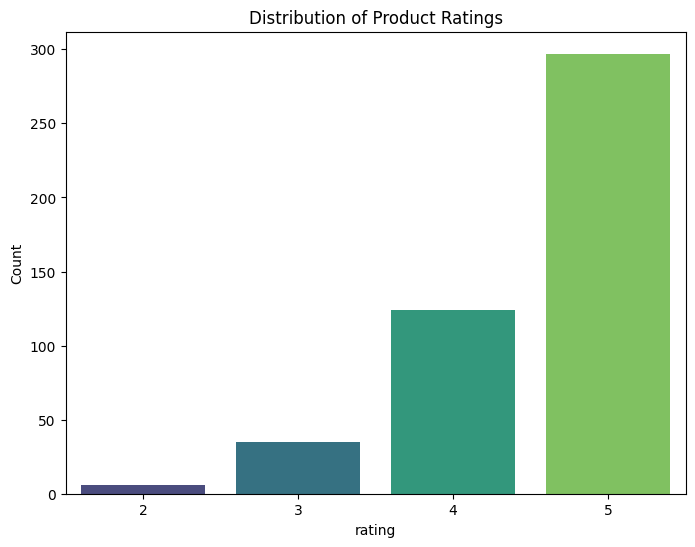

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Rating' is a column in the DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Product Ratings')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4408\2150735539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Score', data=df, palette='coolwarm')


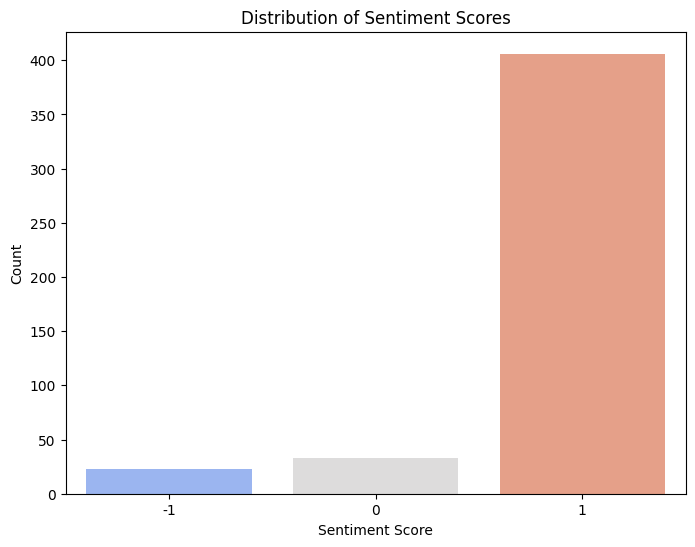

In [15]:
# Assuming 'Sentiment_Score' is the column with mapped scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Score', data=df, palette='coolwarm')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

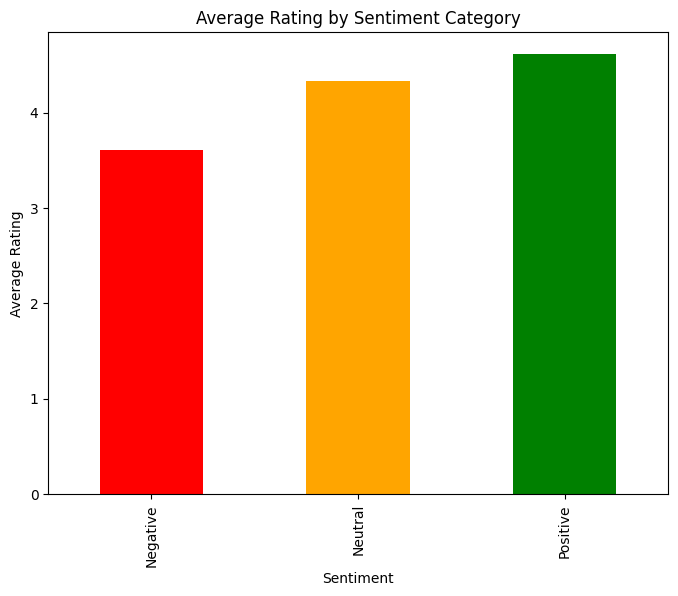

In [16]:
# Calculate the average rating for each sentiment category
avg_rating_by_sentiment = df.groupby('Sentiment')['rating'].mean()

# Plot the average ratings by sentiment
plt.figure(figsize=(8, 6))
avg_rating_by_sentiment.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Average Rating by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

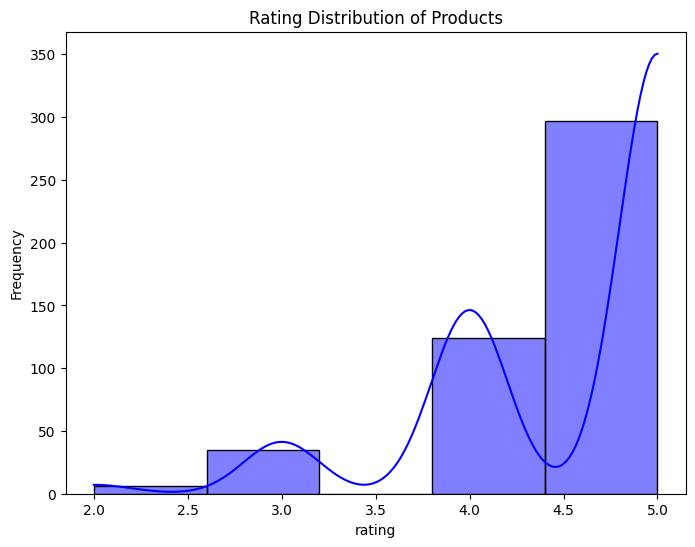

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=True, color='blue')
plt.title('Rating Distribution of Products')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

                                        product_name Sentiment
0  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...  Positive
1  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...  Positive
2  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...  Positive
3  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...  Positive
4  OPPO K12x 5G with 45W SUPERVOOC Charger In-The...  Positive


C:\Users\Admin\AppData\Local\Temp\ipykernel_4408\363249575.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Positive', color='green', label='Positive', ci=None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4408\363249575.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Negative', color='red', label='Negative', ci=None, bottom=sentiment_pivot['Positive'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4408\363249575.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Neutral', color='gray', label='Neutral', ci=None, bottom=sentiment_pivot['Positive']+sentiment_pivot['Negative'])


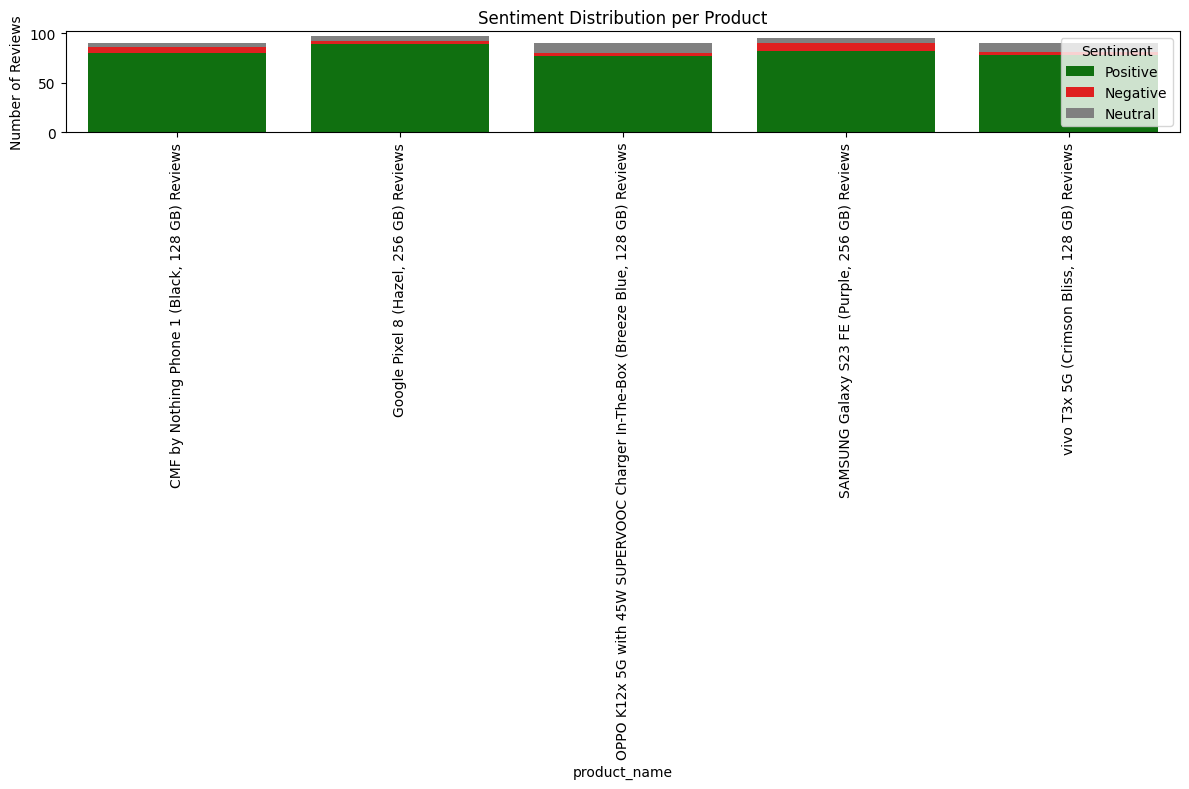

Top product with most positive reviews: Google Pixel 8 (Hazel, 256 GB) Reviews (89 Positive reviews)


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure this path is correct)
df = pd.read_csv('E:/Downloads/sentimentscore.csv')

# Check the first few rows to make sure sentiment is calculated
print(df[['product_name', 'Sentiment']].head())

# Group by product and sentiment, and count the occurrences of each sentiment
sentiment_counts = df.groupby(['product_name', 'Sentiment']).size().reset_index(name='count')

# Pivot the table to make it easier to plot
sentiment_pivot = sentiment_counts.pivot(index='product_name', columns='Sentiment', values='count').fillna(0)

# Plot the sentiment distribution for each product
plt.figure(figsize=(12, 8))
sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Positive', color='green', label='Positive', ci=None)
sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Negative', color='red', label='Negative', ci=None, bottom=sentiment_pivot['Positive'])
sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Neutral', color='gray', label='Neutral', ci=None, bottom=sentiment_pivot['Positive']+sentiment_pivot['Negative'])

# Add labels and title
plt.title('Sentiment Distribution per Product')
plt.xlabel('product_name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)  # Rotate product names to make them readable
plt.legend(title='Sentiment')
plt.tight_layout()

# Show the plot
plt.show()

# Get the product with the highest number of positive reviews
top_product = sentiment_pivot['Positive'].idxmax()
top_product_positive_count = sentiment_pivot['Positive'].max()

# Display the top product with the most positive reviews
print(f"Top product with most positive reviews: {top_product} ({top_product_positive_count} Positive reviews)")